# CNN - Convolutional Neural Network

- kernel/filter layer + ReLu + Pooling 
- Fully Connected Layer

### Architecture 

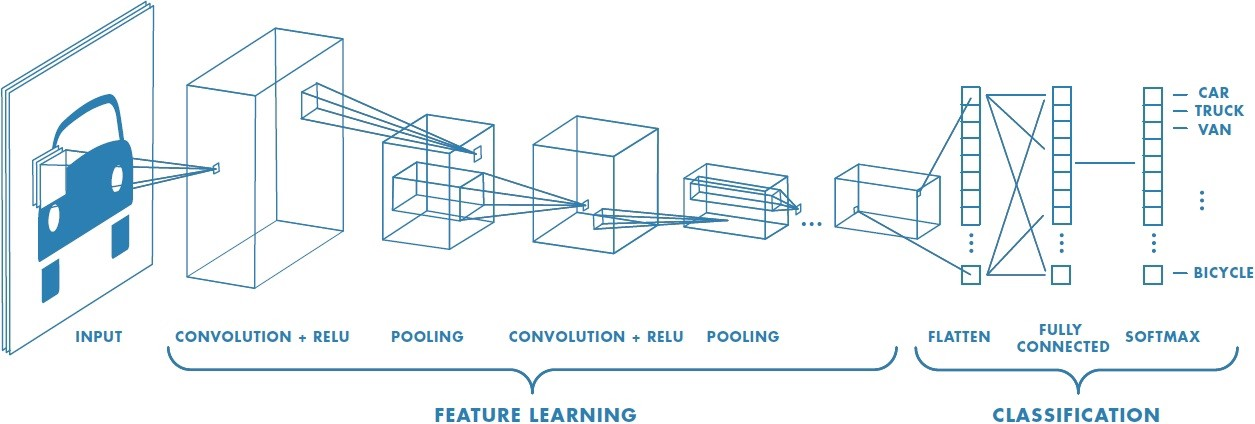


##### Data - CIFAR 10:

- 5 data files with 10k records each 
- Contains 10 Classes:
        - Airplane
        - Automobile
        - Bird
        - Cat
        - Deer
        - Dog
        - Frog
        - Horse
        - Ship
        - Truck

In [2]:
# Libraries

# data libraries
import numpy as np
import pandas as pd
import glob
from cifar_reading import unpickle

# plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
from keras.regularizers import l1
from keras.layers import Conv2D, MaxPooling2D, Flatten

Using TensorFlow backend.


In [3]:
# Unpickle all batches with a total of 50,000 images  
data = glob.glob('cifar-10/cifar-10-python.tar/cifar-10-batches-py/d*')
image_batches = []
for i in data:
    image_batches.append(unpickle(i))

images_data = []
images_data_labels = []
for i in range(len(image_batches)):
    images_data.append(image_batches[i][b'data'])
    images_data_labels.append(image_batches[i][b'labels'])
    
master_image_batch = np.concatenate(images_data)
master_image_labels = np.concatenate(images_data_labels)

print('data',master_image_batch.shape)
print('labels',master_image_labels.shape)

data (50000, 3072)
labels (50000,)


In [4]:
# create data dictionary 

# Unpickle 1st batch with 10,000 images  
labels = unpickle('cifar-10/cifar-10-python.tar/cifar-10-batches-py/batches.meta')

# print image and labels keys
print(labels.keys())

# make a dictionary to map each label to a name 
unique_labels = np.unique(master_image_labels)
label_names = labels[b'label_names']
label_dict = dict(zip(unique_labels, label_names))
label_dict = {k: v.decode('utf-8') for (k, v) in label_dict.items()}

# extract image data and reshape it to pass it through a convolution layer
master_image_batch = master_image_batch.reshape(50000, 3, 32, 32).transpose(0, 2, 3, 1)
master_image_batch_t = master_image_batch.transpose(1, 2, 3, 0)


# check shapes and len

print('{} images, with shape {}'.format(len(master_image_batch),master_image_batch.shape))
print('{} labels, with shape {}'.format(len(master_image_labels),master_image_labels.shape))

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])
50000 images, with shape (50000, 32, 32, 3)
50000 labels, with shape (50000,)


In [6]:
label_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [4]:
# Number of Labels 

num_labels = len(unique_labels)

# convert the labels to one-hot vectors

y_train = to_categorical(master_image_labels)
print(y_train.shape)

(50000, 10)


In [5]:
# input image dimensions 
x_train = master_image_batch
img_size = x_train.shape[1]
print(x_train.max())
print(x_train.min())

255
0


In [6]:
# transform to make it easier for the NN 

x_train = x_train.astype('float32') / 255
x_train.shape
print(x_train.max())
print(x_train.min())

1.0
0.0


###### first cnn = Conv + pool + conv + pool + conv + flat + dropout + fc + output

In [7]:
# Network Parameters
# image is processed as is 
# input shape = rows,cols, channel
input_shape = (32, 32, 3)
batch_size = 128
kernel_size = 3 # 3x3 kernel
pool_size = 2 # 2x2 pooling
filters = 64 # 64 filters in each conv layer
dropout = 0.2

# Model is a stack of CNN-Relu-MaxPooling layers as stated

# Init Model 
model = Sequential()

# l1 Conv + Relu  + Pooling and input layer with 32 * 32 * 3 shape
model.add(Conv2D(filters=filters,
                kernel_size=kernel_size,
                activation='relu',
                input_shape=input_shape))
model.add(MaxPooling2D(pool_size))

# l2 Conv + Relu + Pooling
model.add(Conv2D(filters=filters, 
                kernel_size=kernel_size,
                activation='relu'))
model.add(MaxPooling2D(pool_size))

# L3 Conv and last layer flattened 
model.add(Conv2D(filters=filters,
                kernel_size=kernel_size,
                activation='relu'))
model.add(Flatten())

# Dropout rate - Regularization 

model.add(Dropout(dropout))

# output layer with 10 dim one-hot vectors 
# Fully Connected Layer

model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

# loss function for one-hot vector 
# use adam optimizer
# accuracy 
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=.001),metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
__________

In [8]:
# train 

model.fit(x_train,y_train,epochs=10,batch_size=batch_size)

loss, acc = model.evaluate(x_train,y_train,batch_size=batch_size)
print('Training Acc = {}'.format(acc))

Epoch 1/10
50000/50000 [==============================] - 186s 4ms/step - loss: 1.6681 - acc: 0.3866
Epoch 2/10
50000/50000 [==============================] - 160s 3ms/step - loss: 1.3314 - acc: 0.5226
Epoch 3/10
50000/50000 [==============================] - 162s 3ms/step - loss: 1.1933 - acc: 0.5804
Epoch 4/10
50000/50000 [==============================] - 165s 3ms/step - loss: 1.0881 - acc: 0.6192
Epoch 5/10
50000/50000 [==============================] - 165s 3ms/step - loss: 1.0199 - acc: 0.6439
Epoch 6/10
50000/50000 [==============================] - 163s 3ms/step - loss: 0.9614 - acc: 0.6645
Epoch 7/10
50000/50000 [==============================] - 185s 4ms/step - loss: 0.9213 - acc: 0.6789
Epoch 8/10
50000/50000 [==============================] - 200s 4ms/step - loss: 0.8898 - acc: 0.6903
Epoch 9/10
50000/50000 [==============================] - 197s 4ms/step - loss: 0.8591 - acc: 0.6995
Epoch 10/10
50000/50000 [==============================] - 61s 1ms/step
Training Acc = 0.73

###### first cnn = Conv + pool + conv + pool + conv + flat + dropout + fc + output
###### second cnn = Conv + conv + pool + dropout + conv + conv + pool + flat + dropout + fc + output 

In [19]:
# Network Parameters
# image is processed as is 
# input shape = rows,cols, channel

input_shape = (32, 32, 3)
batch_size = 128
kernel_size = 3 # 3x3 kernel
pool_size = 2 # 2x2 pooling
filters = 64 # 64 filters in each conv layer
dropout = 0.2

# Init Model 
model = Sequential()

# l1 Conv + Relu  + Pooling and input layer with 32 * 32 * 3 shape
model.add(Conv2D(filters=filters,
                kernel_size=kernel_size,padding='same',
                activation='relu',
                input_shape=input_shape))

model.add(Conv2D(filters=filters,
                kernel_size=kernel_size,padding='same',
                activation='relu'))

model.add(MaxPooling2D(pool_size))

model.add(Dropout(dropout))

model.add(Conv2D(filters=filters,
                kernel_size=kernel_size,padding='same',
                activation='relu'))

model.add(Conv2D(filters=filters,
                kernel_size=kernel_size,padding='same',
                activation='relu'))

model.add(MaxPooling2D(pool_size))

model.add(Flatten())

model.add(Dropout(dropout))

model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

# loss function for one-hot vector 
# use adam optimizer
# accuracy 
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=.001),metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [20]:
# train 

model.fit(x_train,y_train,epochs=15,batch_size=batch_size)

loss, acc = model.evaluate(x_train,y_train,batch_size=batch_size)
print('Training Acc = {}'.format(acc))

Epoch 1/15
50000/50000 [==============================] - 654s 13ms/step - loss: 1.5358 - acc: 0.4487
Epoch 2/15
50000/50000 [==============================] - 658s 13ms/step - loss: 1.0783 - acc: 0.6227
Epoch 3/15
50000/50000 [==============================] - 653s 13ms/step - loss: 0.9008 - acc: 0.6874
Epoch 4/15
50000/50000 [==============================] - 658s 13ms/step - loss: 0.7994 - acc: 0.7221
Epoch 5/15
50000/50000 [==============================] - 665s 13ms/step - loss: 0.7308 - acc: 0.7473
Epoch 6/15
50000/50000 [==============================] - 656s 13ms/step - loss: 0.6746 - acc: 0.7667
Epoch 7/15
50000/50000 [==============================] - 655s 13ms/step - loss: 0.6306 - acc: 0.7828
Epoch 8/15
50000/50000 [==============================] - 653s 13ms/step - loss: 0.5899 - acc: 0.7956
Epoch 9/15
50000/50000 [==============================] - 657s 13ms/step - loss: 0.5578 - acc: 0.8048
Epoch 10/15
50000/50000 [==============================] - 649s 13ms/step - loss: 

In [21]:
test_data = ('cifar-10/cifar-10-python.tar/cifar-10-batches-py/test_batch')
tdata = unpickle(test_data)
tdata.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [24]:
x_test = tdata[b'data']
x_test = x_test.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
# x_test = x_test.transpose(1, 2, 3, 0)
x_test = x_test.astype('float32') / 255.0
y_test = tdata[b'labels']
y_test_one = to_categorical(y_test)
loss, acc = model.evaluate(x_test,y_test_one, batch_size=50)
print('Test Loss {}'.format(loss))
print('Test Accuracy {:.02f}'.format(acc * 100))

10000/10000 [==============================] - 50s 5ms/step
Test Loss 0.6702801410853862
Test Accuracy 77.68


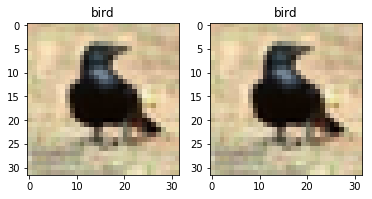

In [51]:
ids = 5042
plt.subplot(1,2,1)
plt.imshow(x_test[ids])
plt.title(label_dict[y_test[ids]])
plt.subplot(1,2,2)
plt.imshow(x_test[ids])
plt.title(label_dict[np.argmax(model.predict(x_test[ids].reshape(1,32,32,3)))])
plt.show()

In [44]:
y_pred = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]


[3, 8, 1, 0, 6, 6, 1, 2, 3, 1]

In [54]:
y_pred_name =[label_dict[i] for i in y_pred]
y_pred_name[:10]

['cat',
 'ship',
 'automobile',
 'airplane',
 'frog',
 'frog',
 'automobile',
 'bird',
 'cat',
 'automobile']

# confusion matrix

In [92]:
from sklearn.metrics import confusion_matrix
import itertools

In [83]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[838,  15,  37,  16,   7,   1,   4,   9,  46,  27],
       [ 17, 888,   3,   1,   1,   2,   3,   4,  12,  69],
       [ 74,   4, 714,  43,  55,  33,  26,  29,  13,   9],
       [ 28,   8,  88, 604,  42, 144,  34,  29,  11,  12],
       [ 20,   1,  97,  50, 716,  18,   8,  80,   7,   3],
       [ 16,   2,  74, 131,  31, 683,  11,  45,   2,   5],
       [ 10,   6, 101,  61,  42,  20, 739,   5,  12,   4],
       [ 16,   3,  38,  21,  27,  43,   2, 837,   3,  10],
       [ 55,  21,  11,   2,   3,   1,   1,   6, 878,  22],
       [ 31,  51,   6,  13,   0,   2,   1,  11,  14, 871]], dtype=int64)

In [103]:
def plot_cm(cm,classes, normalize=False,title='cm',cmap=plt.cm.Blues,verbose=False):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized')
    else:
        print('Cm, not normalized')
    
    if verbose:
        print(cm)
    
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
        horizontalalignment='center',
        color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted')
    
    

Cm, not normalized


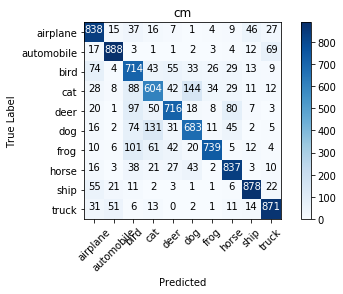

In [105]:
cm_labels = list(label_dict.values())
plot_cm(cm,cm_labels)

# Save and Load Model

In [106]:
model.save('cnn_classifier.h5')

In [118]:
import h5py
f1 = h5py.File('cnn_classifier.h5', 'r')
print(list(f1.keys()))
[key for key in f1['model_weights'].keys()]

['model_weights', 'optimizer_weights']


['activation_3',
 'conv2d_10',
 'conv2d_11',
 'conv2d_8',
 'conv2d_9',
 'dense_3',
 'dropout_4',
 'dropout_5',
 'flatten_3',
 'max_pooling2d_5',
 'max_pooling2d_6']

In [146]:
len(f1['model_weights']['conv2d_8']['conv2d_8']['kernel:0'].value[0,0,0])

64

In [147]:
# in case we would like to load the model 
from keras.models import load_model

new_model = load_model('cnn_classifier.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [150]:
len(new_model.get_weights()[0])

3

In [162]:
import keras.backend as K
K.eval(new_model.optimizer.lr)

0.001

# model to JSON

- saves architecture

In [163]:
json_model = model.to_json()
json_model

'{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d_8", "trainable": true, "batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Conv2D", "config": {"name": "conv2d_9", "trainable": true, "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"clas

In [165]:
from keras.models import model_from_json
model_archi = model_from_json(json_model)
model_archi.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
__________

# save weights

In [166]:
model.save_weights('cnn_classifier_w.h5')


In [167]:
model_archi.load_weights('cnn_classifier_w.h5')

In [172]:
np.argmax(model_archi.predict(x_test[3].reshape(1,32,32,3)))

0

In [174]:
import pickle

# save model to disk

pickle.dump(model,open('cnn_clf','wb'))

In [175]:
loaded_model = pickle.load(open('cnn_clf','rb'))
np.argmax(loaded_model.predict(x_test[3].reshape(1,32,32,3)))

0

In [223]:
prediction = model.predict(x_test[:1])

for i in prediction:
    print(label_dict[np.argmax(i)])
    


cat


In [216]:
pickle.dump(label_dict,open('labels','wb'))

In [1]:
new_model.get_weights()

NameError: name 'new_model' is not defined